<a href="https://colab.research.google.com/github/kitkate8/BioPhysHW/blob/main/Homework/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Exploring initial conditions** Using the same model parameters we explored in class, explore computationally what happens if you start out with:

 a. a uniform distribution of both inhibitor and activator?

 b. no inhibitor but a random distribution of activator?

  Explain for each case why your computational result makes sense. You should be interpreting the reaction-diffusion equation (you can play with it a little to test your understanding).

Write your answer here

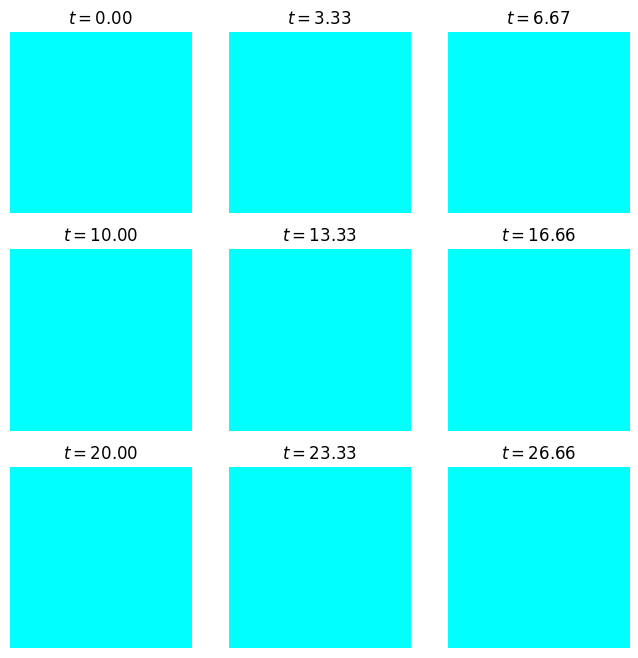

In [2]:


import matplotlib.pyplot as plt
import numpy as np

D_a = 1
D_b = 100
k = -0.005
beta = 10

size = 100  # size of the 2D grid
dx = 1.   # space step
T = 30.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations


a = b = np.full((size, size), 0.6) # uniform distribution


def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.cool)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of a and b.
    delta_a = laplacian(a)
    delta_b = laplacian(b)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    bc = b[:,:]
    # We update the variables.
    a[:,:], b[:,:] = \
        ac + dt * (D_a * delta_a + ac - ac**3 - bc + k),\
        bc + dt * (D_b * delta_b + beta*(ac - bc))


    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

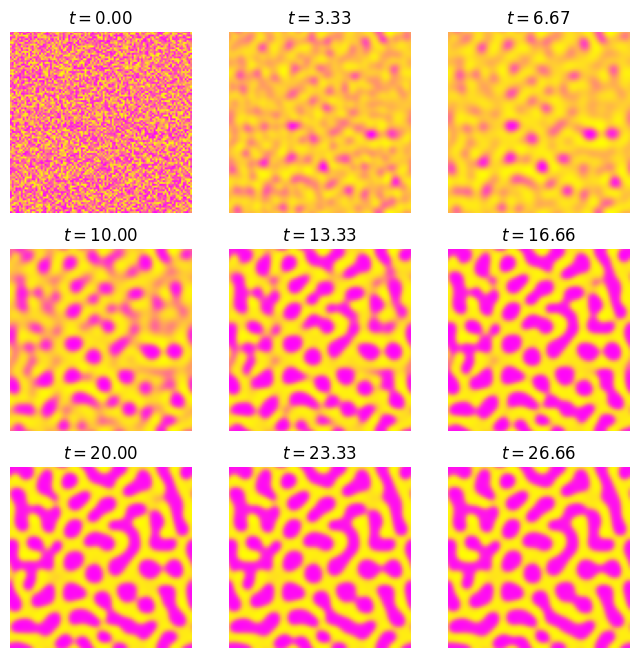

In [9]:
# no inhibitor and random distribution of activator
a = np.random.rand(size, size)
b = np.zeros((size, size))
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
for i in range(n):
    # We compute the Laplacian of a and b.
    delta_a = laplacian(a)
    delta_b = laplacian(b)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    bc = b[:,:]
    # We update the variables.
    a[:,:], b[:,:] = \
        ac + dt * (D_a * delta_a + ac - ac**3 - bc + k),\
        bc + dt * (D_b * delta_b + beta*(ac - bc))
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

Both eventually led to pattern formation? For the no inhibitor it makes sense because

2. **Activator does not activate inhibitor** Explore computationally what would happen if the activator only activates itself but not the inhibitor? What happens if you start with no inhibitor? Explain your computational results.

Write your answer here

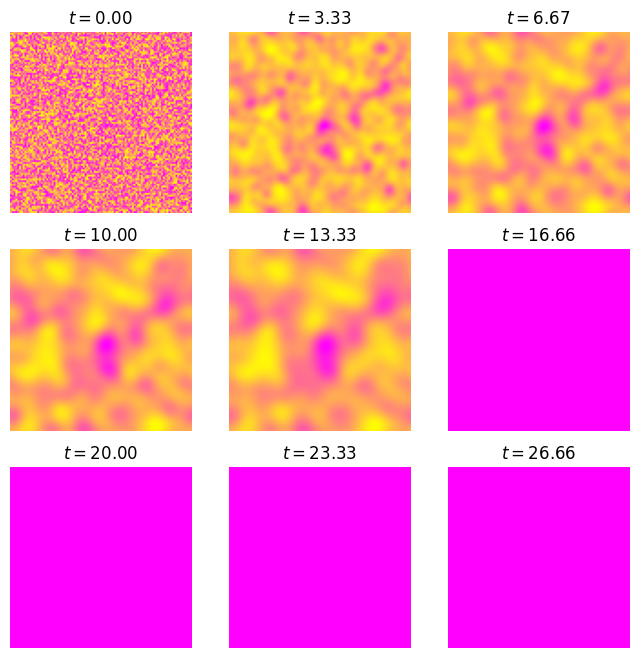

In [3]:
import matplotlib.pyplot as plt
import numpy as np

D_a = 1
D_b = 100
k = -0.005
beta = 10

size = 100  # size of the 2D grid
dx = 1.   # space step
T = 30.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

a = np.random.rand(size, size)
b = np.random.rand(size, size)

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.spring)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of a and b.
    delta_a = laplacian(a)
    delta_b = laplacian(b)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    bc = b[:,:]
    # We update the variables.
    a[:,:], b[:,:] = \
        ac + dt * (D_a * delta_a + ac - ac**3 + k),\
        bc + dt * (D_b * delta_b + beta*(ac - bc))
# removed the b term to simulate not activating inhibitor

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

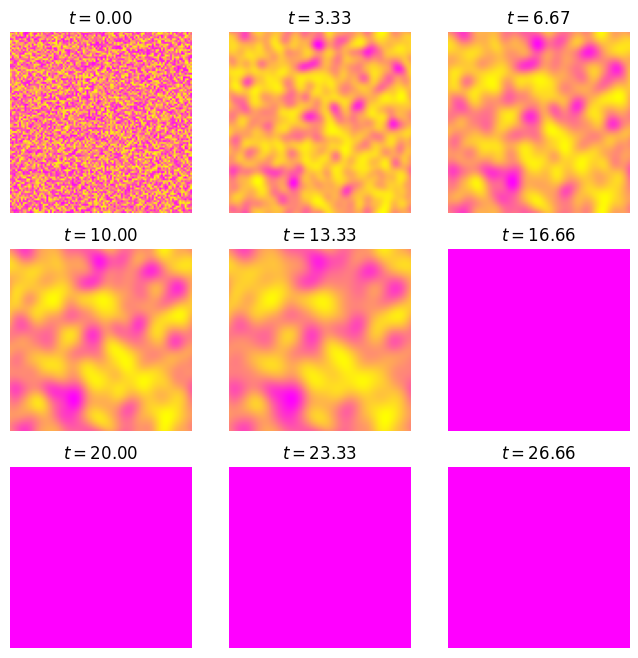

In [8]:
import matplotlib.pyplot as plt
import numpy as np

D_a = 1
D_b = 100
k = -0.005
beta = 10

size = 100  # size of the 2D grid
dx = 1.   # space step
T = 30.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

a = np.random.rand(size, size)
b = np.zeros((size, size)) # no inhibitor

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.spring)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of a and b.
    delta_a = laplacian(a)
    delta_b = laplacian(b)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    bc = b[:,:]
    # We update the variables.
    a[:,:], b[:,:] = \
        ac + dt * (D_a * delta_a + ac - ac**3 + k),\
        bc + dt * (D_b * delta_b + beta*(bc))

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

3. Let's now explore a different set of reaction equations for our reaction-diffusion model. We will look at the Gierer-Meinhardt model. You can read more about the background of it here: https://link.springer.com/article/10.1007/s10994-023-06334-9#code-availability, but the equations are as follows:


$\frac{\partial a}{\partial t} = D_a \Delta a+ \alpha - \beta a + \frac{a^2}{h(1+ \kappa a^2)} $

$\frac{\partial h}{\partial t} = D_h \Delta h + a^2 - h $


where $a$ is the activator and $h$ is the inhibitor.

Explore this Gierer-Meinhardt model by plotting out the evolution of patterning for the following parameters: (T is the total time)
1. $D_a$, $D_h$, $\alpha$, $\beta$, $\kappa$, $T$ = 1, 40, 0.01, 1.2, 0.7, 100
2. $D_a$, $D_h$, $\alpha$, $\beta$, $\kappa$, $T$ = 1, 50, 0.01, 1.2, 0.1, 40
3. $D_a$, $D_h$, $\alpha$, $\beta$, $\kappa$, $T$ = 1, 25, 0.02, 1.0, 0.5, 500

Use a size of 128 for your 2D square grid, a step size of $dx = 1$, $dt = 0.001$, and start with random initial conditions.

Show your pattern results - what patterns did you get?


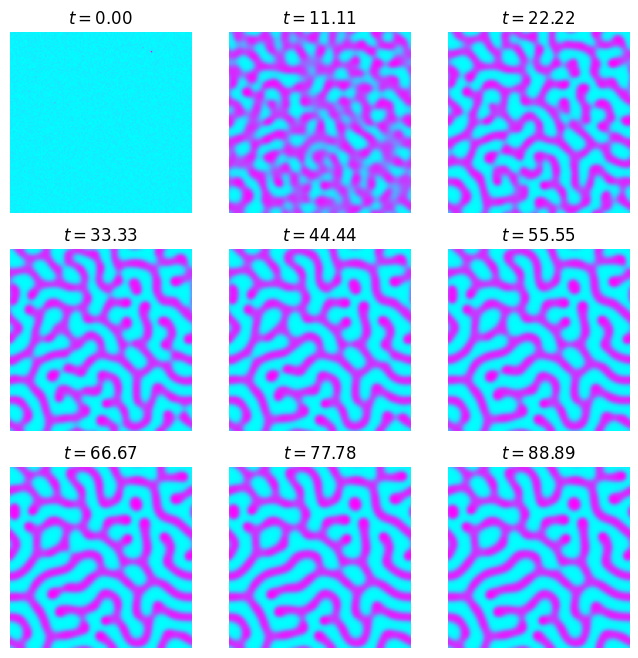

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#universal paramenters:
size = 128
dx = 1
dt = 0.001
D_a = 1

#parameters to change:
D_h = 40
alpha = 0.01
beta = 1.2
kappa = 0.7
T = 100
n = int(T/dt)

#random distributions of chemicals
a = np.random.rand(size, size)
h = np.random.rand(size, size)

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.cool)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9


for i in range(n):
    delta_a = laplacian(a)
    delta_h = laplacian(h)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    hc = h[:,:]
    # We update the variables.
    a[:,:], h[:,:] = \
        ac + dt * (D_a * delta_a + alpha - beta * ac + (a**2)/(hc * (1 + kappa * ac ** 2) )),\
        hc + dt * (D_h * delta_h + ac**2 - hc)
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

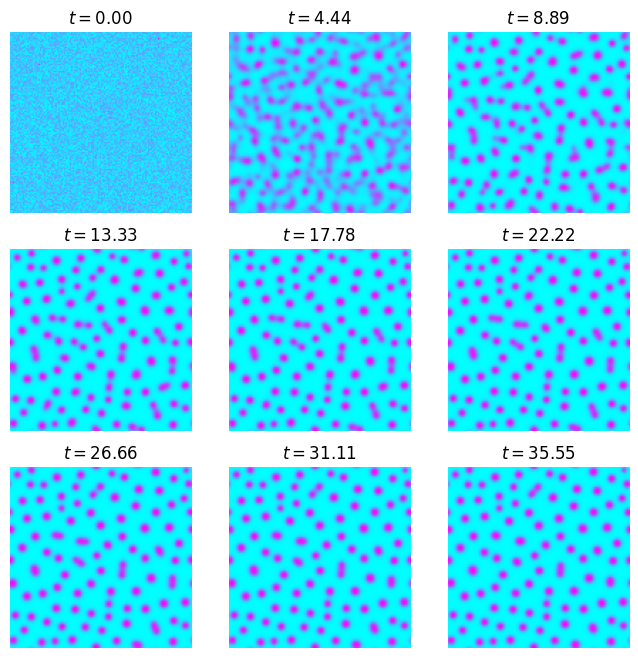

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#universal paramenters:
size = 128
dx = 1
dt = 0.001
D_a = 1

#parameters to change:
D_h = 50
alpha = 0.01
beta = 1.2
kappa = 0.1
T = 40
n = int(T/dt)

#random distributions of chemicals
a = np.random.rand(size, size)
h = np.random.rand(size, size)

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.cool)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9


for i in range(n):
    delta_a = laplacian(a)
    delta_h = laplacian(h)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    hc = h[:,:]
    # We update the variables.
    a[:,:], h[:,:] = \
        ac + dt * (D_a * delta_a + alpha - beta * ac + (a**2)/(hc * (1 + kappa * ac ** 2) )),\
        hc + dt * (D_h * delta_h + ac**2 - hc)
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')



In [ ]:



import numpy as np
import matplotlib.pyplot as plt

#universal paramenters:
size = 128
dx = 1
dt = 0.001
D_a = 1

#parameters to change:
D_h = 25
alpha = 0.02
beta = 1.0
kappa = 0.5
T = 500
n = int(T/dt)

#random distributions of chemicals
a = np.random.rand(size, size)
h = np.random.rand(size, size)

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0)
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)

def show_patterns(A, ax=None):
    ax.imshow(A, cmap=plt.cm.cool)
    ax.set_axis_off()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9


for i in range(n):
    delta_a = laplacian(a)
    delta_h = laplacian(h)
    # We take the values of a and b inside the grid.
    ac = a[:,:]
    hc = h[:,:]
    # We update the variables.
    a[:,:], h[:,:] = \
        ac + dt * (D_a * delta_a + alpha - beta * ac + (a**2)/(hc * (1 + kappa * ac ** 2) )),\
        hc + dt * (D_h * delta_h + ac**2 - hc)
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(a, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

